# Statictical Modeling and Advanced Regression Analyses

R Tutorials

Holger Sennhenn-Reulen [](https://orcid.org/0000-0002-4782-4387) (Northwest German Forest Research Institute (NW-FVA))  
October 14, 2024

# Software

We use the statistical software environment *R* \[@RCoreTeam2024\], and R add-on packages *ggplot2* \[@Wickham2016\], and *arm* \[@GelmanSu2024\].

This document is produced using *Quarto* \[@AllaireEtAl2024\]. <!-- Graphics in the PDF version are rendered using R add-on package *tikzDevice* [@SharpsteenBracken2023].  -->

## Organize R Session

In [ ]:
rm(list = ls())
library("ggplot2")

# Linear Regression Model

## Data Simulation

Data are simulated according to the equations given in the lecture slides[1]:

[1] For two covariates `x_1` and `x_2`.

In [ ]:
set.seed(123)
N <- 500
df <- data.frame(x_1 = runif(n = N), 
                 x_2 = runif(n = N))
(beta_0 <- rnorm(n = 1, mean = 1, sd = .1))

[1] 0.9398107

[1] 0.9006301

[1] -0.3973215

[1] 0.293026

### Visualisations

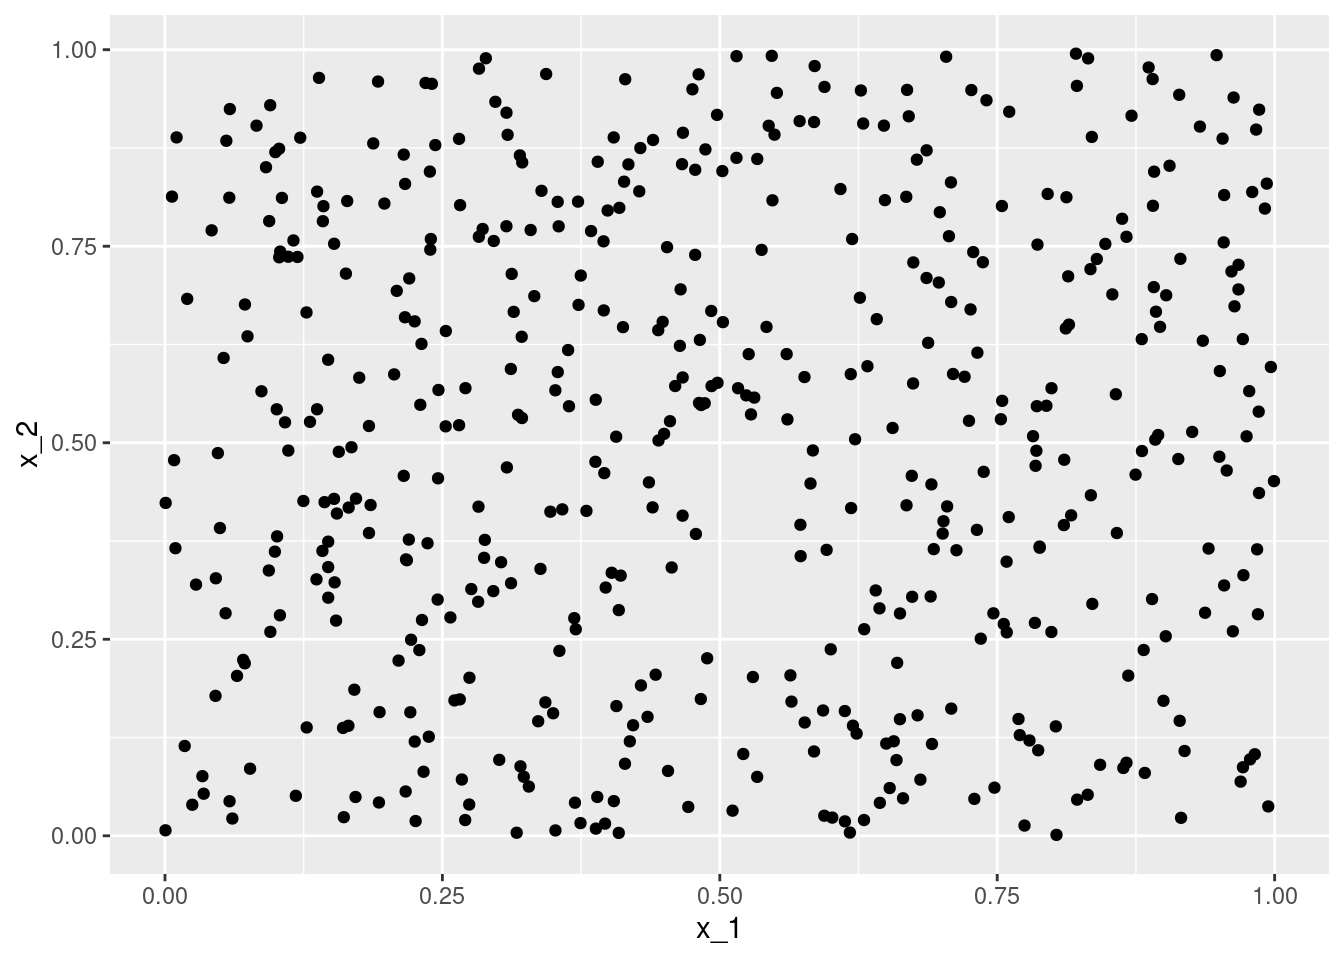

In [ ]:
ggplot(data = df, aes(x = x_1, y = x_2)) + 
  geom_point()

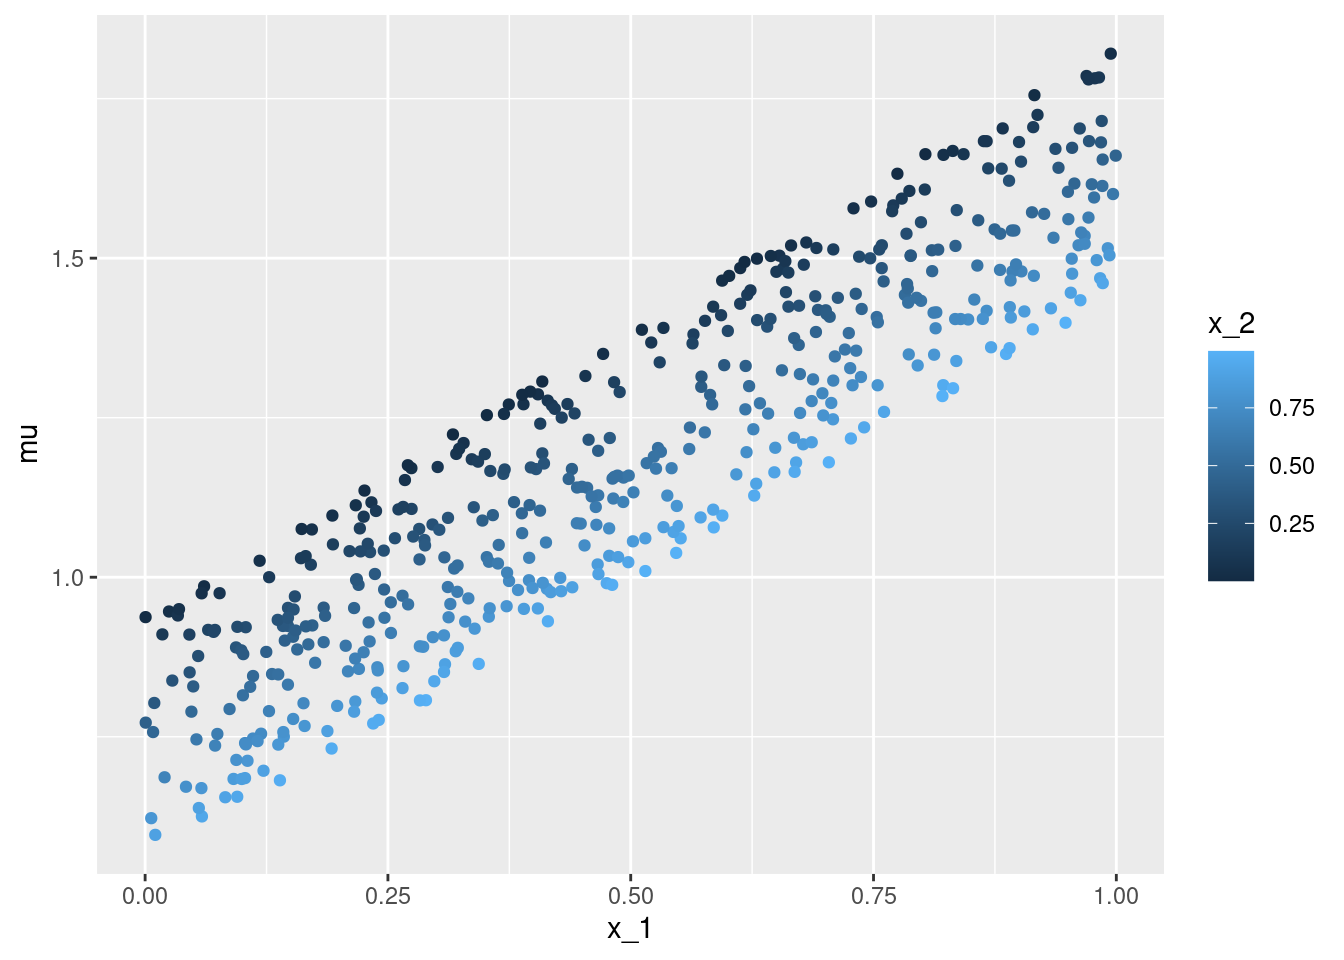

In [ ]:
ggplot(data = df, aes(x = x_1, y = mu, color = x_2)) + 
  geom_point()

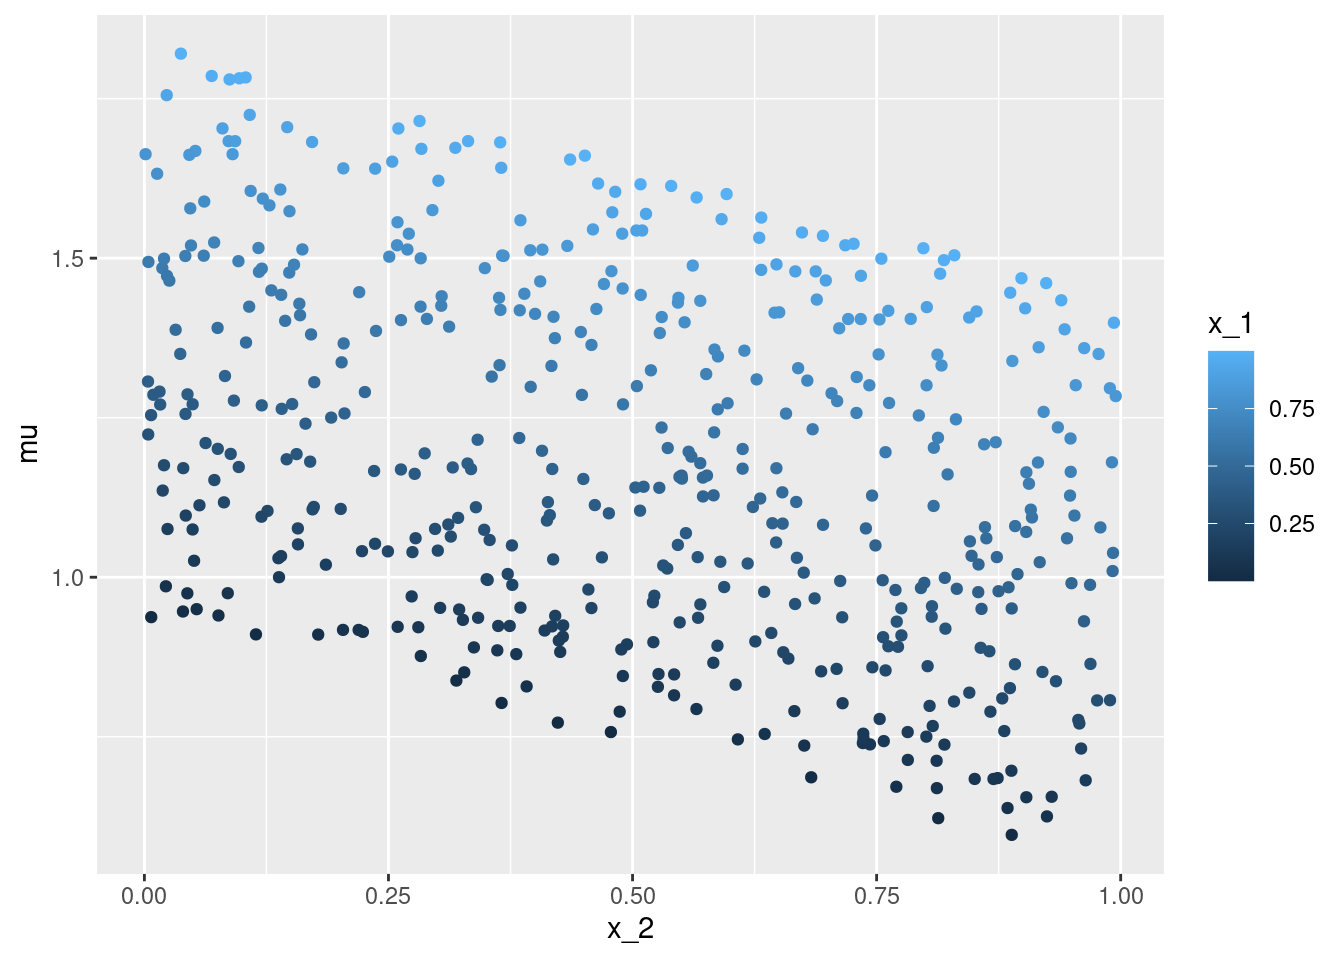

In [ ]:
ggplot(data = df, aes(x = x_2, y = mu, color = x_1)) + 
  geom_point()

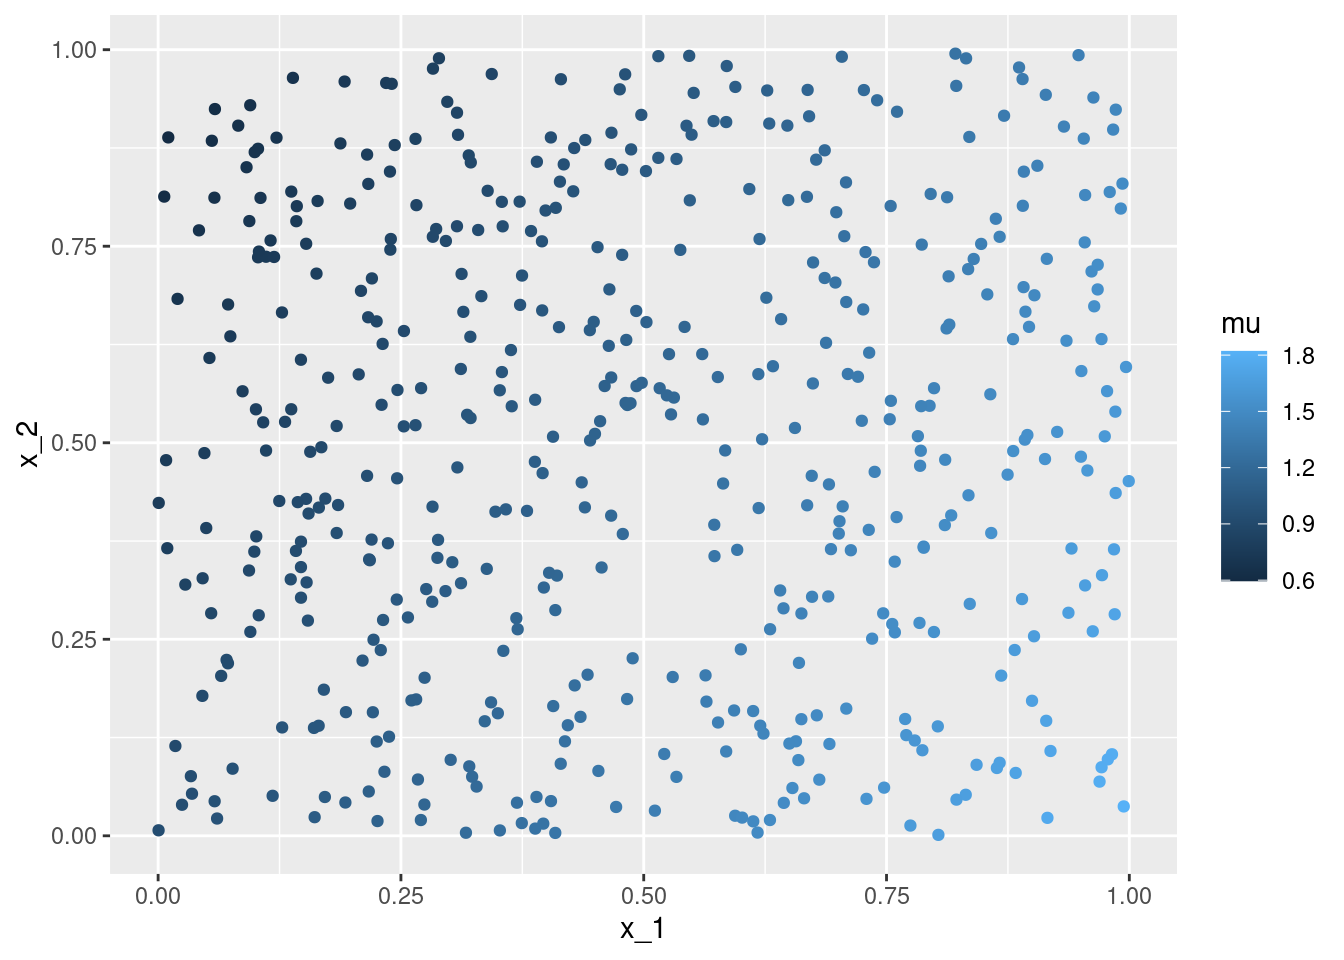

In [ ]:
ggplot(data = df, aes(x = x_1, y = x_2, color = mu)) + 
  geom_point()

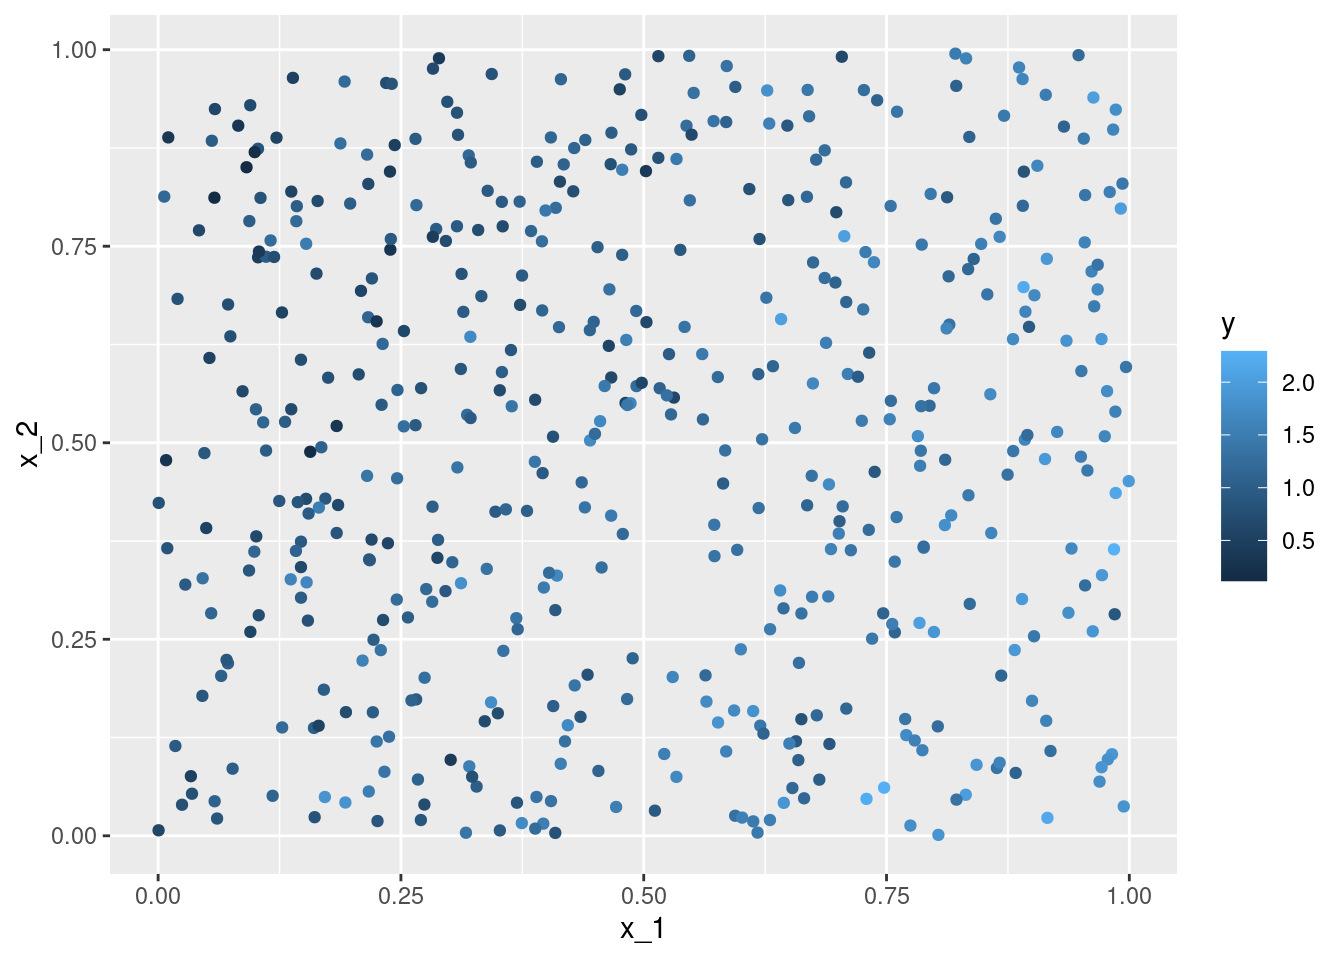

In [ ]:
ggplot(data = df, aes(x = x_1, y = x_2, color = y)) + 
  geom_point()

## Modeling

The basic R command for (frequentist) estimation of the parameters of a linear regression model is a call to the function `lm`:

In [ ]:
m <- lm(y ~ x_1 + x_2, data = df)
summary(m)


Call:
lm(formula = y ~ x_1 + x_2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82082 -0.19805  0.00329  0.19051  0.81138 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.91291    0.03448  26.476  < 2e-16 ***
x_1          0.91533    0.04668  19.610  < 2e-16 ***
x_2         -0.36218    0.04566  -7.933 1.43e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2963 on 497 degrees of freedom
Multiple R-squared:  0.4674,    Adjusted R-squared:  0.4652 
F-statistic:   218 on 2 and 497 DF,  p-value: < 2.2e-16

### Visualisations

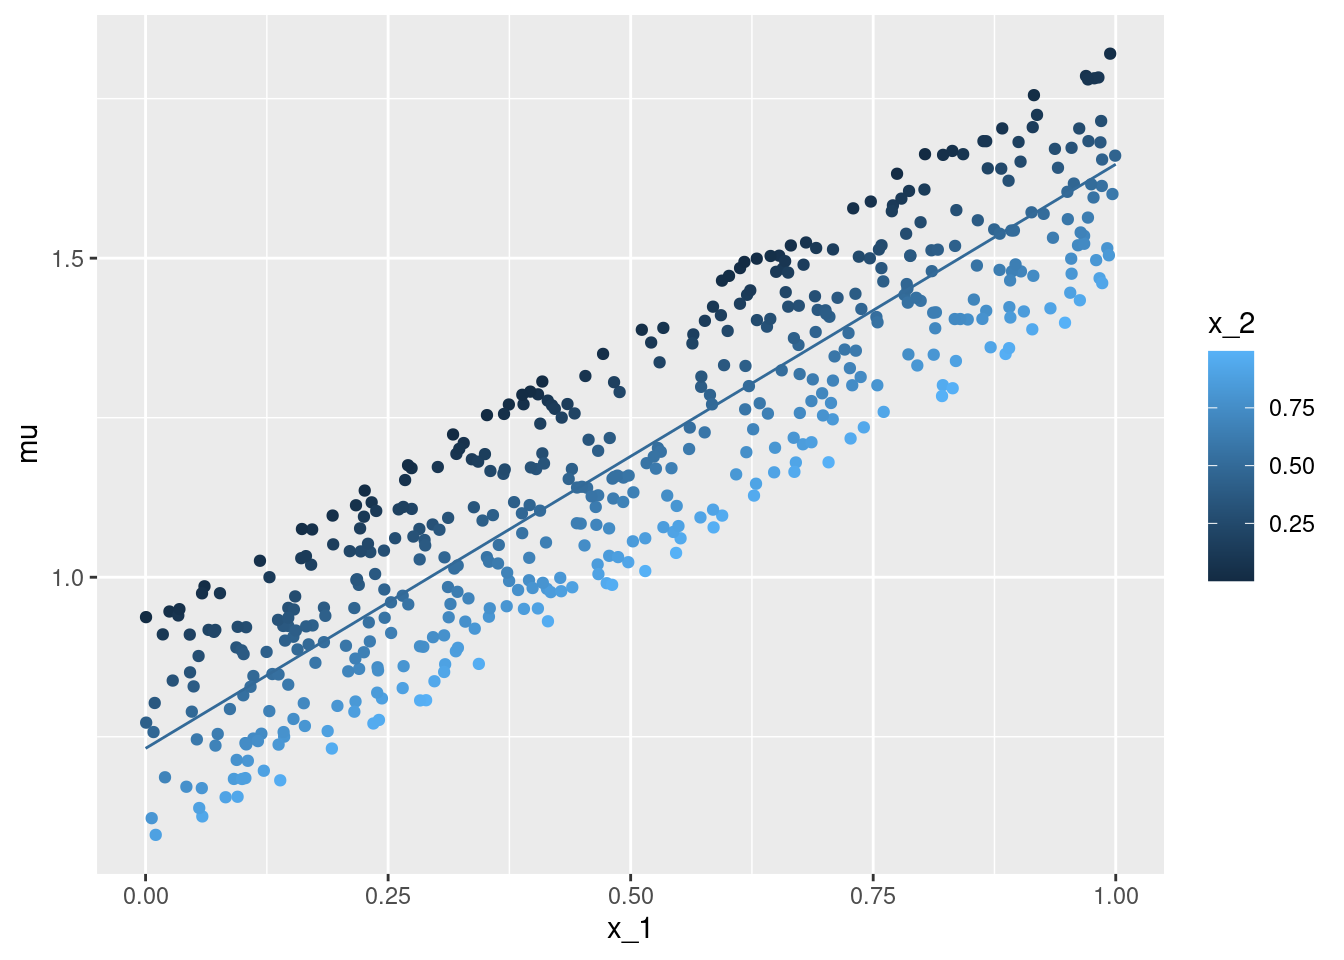

In [ ]:
nd <- data.frame(x_1 = seq(0, 1, by = .1), 
                 x_2 = .5)
nd$mu <- predict(m, newdata = nd)
ggplot(data = df, aes(x = x_1, y = mu, color = x_2)) + 
  geom_point() + 
  geom_line(data = nd, aes(x = x_1, y = mu, color = x_2))

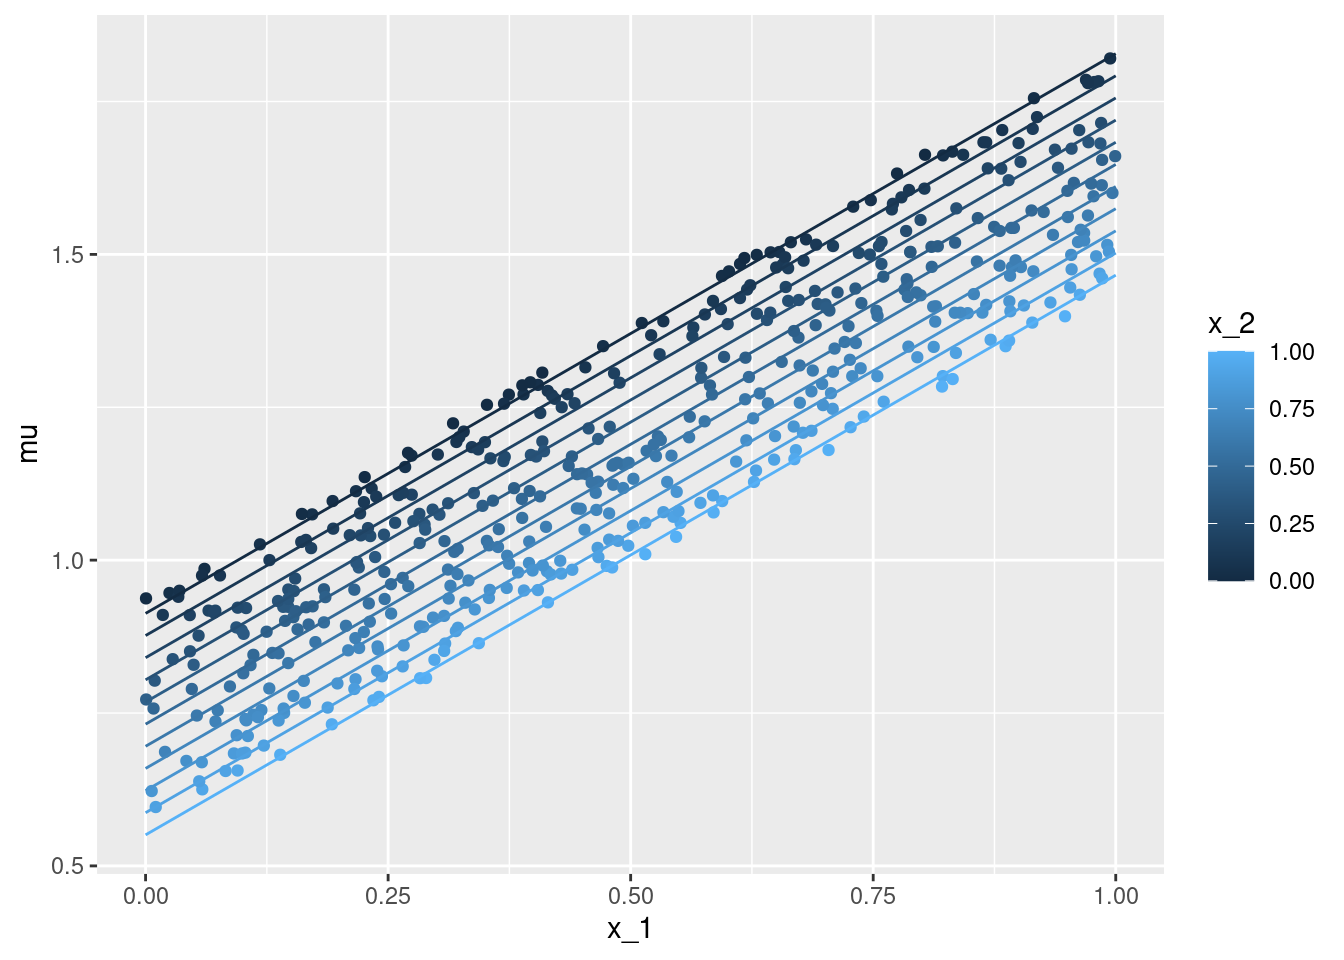

In [ ]:
nd <- data.frame(expand.grid('x_1' = seq(0, 1, by = .1), 
                             'x_2' = seq(0, 1, by = .1)))
nd$mu <- predict(m, newdata = nd)
ggplot(data = df, aes(x = x_1, y = mu, color = x_2)) + 
  geom_point() + 
  geom_line(data = nd, aes(x = x_1, y = mu, color = x_2, group = x_2))

## Add-Ons

### Add-On Linear Model: A) Stancode

#### Stan Users Guide

*Probabilistic Programming Languages* such as *Stan* \[@CarpenterEtAl2017\] allow to `plug together` the single parts of a statistical regression model[1]:

The following Stan-code is published [here](https://mc-stan.org/docs/stan-users-guide/regression.html) in the [Stan users guide](https://mc-stan.org/docs/stan-users-guide/index.html):

[1] Which is actually pretty ‘readable’ if you get used to the structure for a simple model such the linear regression model.

In [ ]:
cat(readLines("lm.stan"), sep = "\n")

data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  y ~ normal(alpha + beta * x, sigma);
}

#### Stancode generated by calling `brms::brm`

The R add-on package *brms* \[@Buerkner2017;@Buerkner2018\] allows to implent advanced regression models without being an expert in ‘Stan-programming’.

Here is the Stan-code that is implemented by ‘brms’ for our linear regression model example:

In [ ]:
brms::make_stancode(brms::bf(y ~ x_1 + x_2, center = F), data = df)

In [ ]:
cat(readLines("lm_brms.stan"), sep = "\n")

// generated with brms 2.21.0
functions {
}
data {
  int<lower=1> N;  // total number of observations
  vector[N] Y;  // response variable
  int<lower=1> K;  // number of population-level effects
  matrix[N, K] X;  // population-level design matrix
  int prior_only;  // should the likelihood be ignored?
}
transformed data {
}
parameters {
  vector[K] b;  // regression coefficients
  real<lower=0> sigma;  // dispersion parameter
}
transformed parameters {
  real lprior = 0;  // prior contributions to the log posterior
  lprior += student_t_lpdf(sigma | 3, 0, 2.5)
    - 1 * student_t_lccdf(0 | 3, 0, 2.5);
}
model {
  // likelihood including constants
  if (!prior_only) {
    target += normal_id_glm_lpdf(Y | X, 0, b, sigma);
  }
  // priors including constants
  target += lprior;
}
generated quantities {
}

### Add-On Linear Model: B) Posterior predictive check: an introduction ‘by hand’

Having an `lm` object already, it is rather straightforward to get posterior samples by using function `sim` from the *arm* \[@GelmanSu2024\] package:

In [ ]:
library("arm")

Lade nötiges Paket: MASS

Lade nötiges Paket: Matrix

Lade nötiges Paket: lme4


arm (Version 1.14-4, built: 2024-4-1)

Working directory is /home/hsennhenn/Dropbox/teaching/Statistical_Modeling_and_Advanced_Regression_Analyses

Formal class 'sim' [package "arm"] with 2 slots
  ..@ coef : num [1:100, 1:3] 0.882 1.014 0.904 0.978 0.958 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:3] "(Intercept)" "x_1" "x_2"
  ..@ sigma: num [1:100] 0.323 0.303 0.292 0.309 0.29 ...

     (Intercept)       x_1        x_2     sigma
[1,]   0.8816414 0.9245094 -0.3362733 0.3227662
[2,]   1.0139849 0.7317948 -0.3398411 0.3033703
[3,]   0.9037042 0.9155575 -0.3506924 0.2922883
[4,]   0.9776909 0.8392790 -0.3845609 0.3090220
[5,]   0.9579213 0.8977625 -0.4284596 0.2900632
[6,]   0.9549211 0.8478278 -0.3937226 0.3094227

Predict the response for the covariate data as provided by the original data-frame `df` - here only by using the first posterior sample:

(Intercept)         x_1         x_2       sigma 
  0.8816414   0.9245094  -0.3362733   0.3227662 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

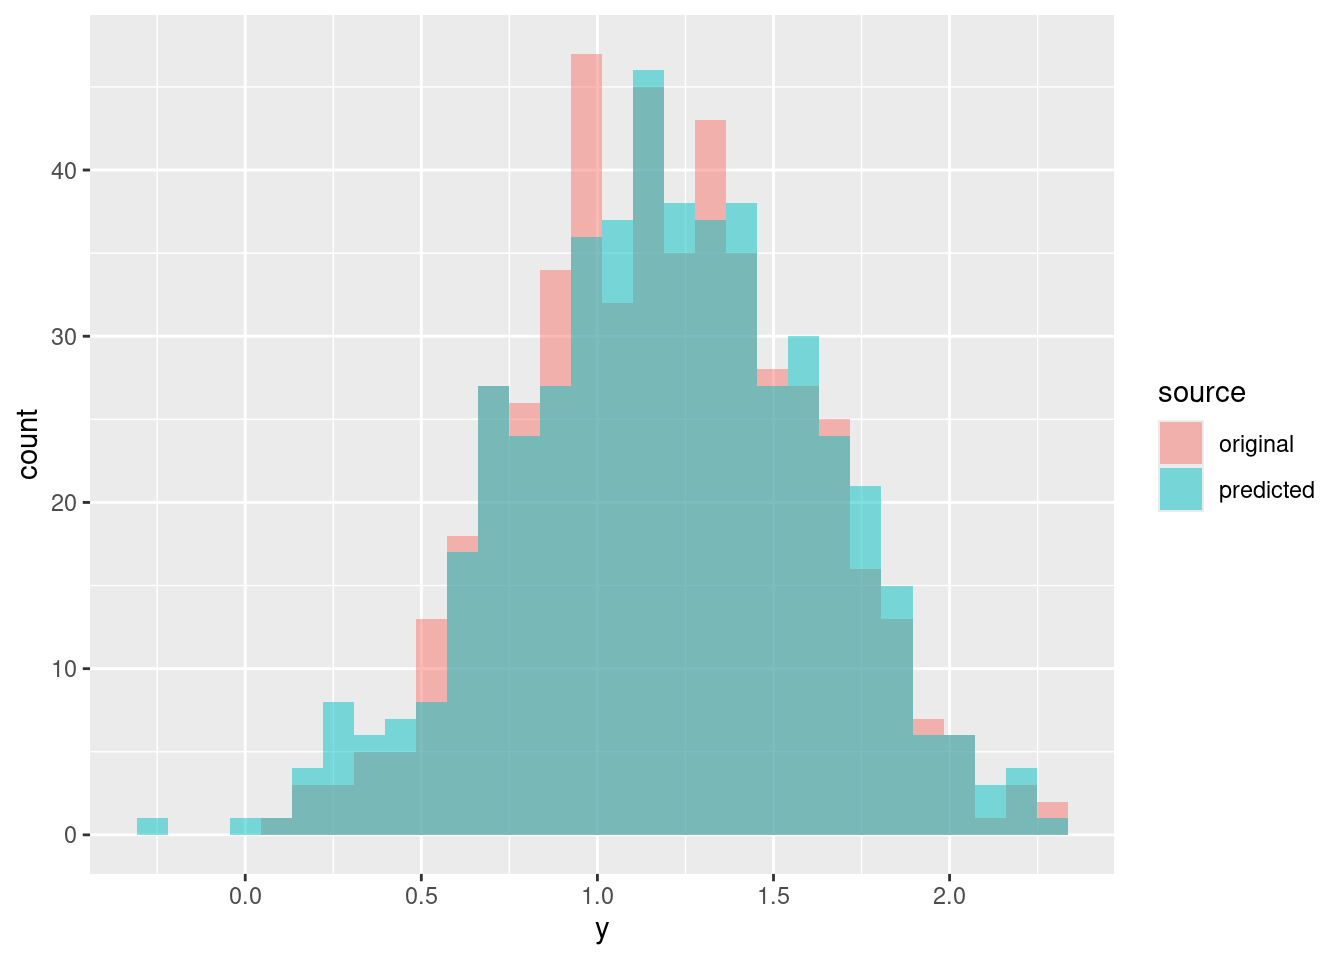

In [ ]:
s <- 1
S[s, ]

Now let’s repeat the same for 9 different posterior samples:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

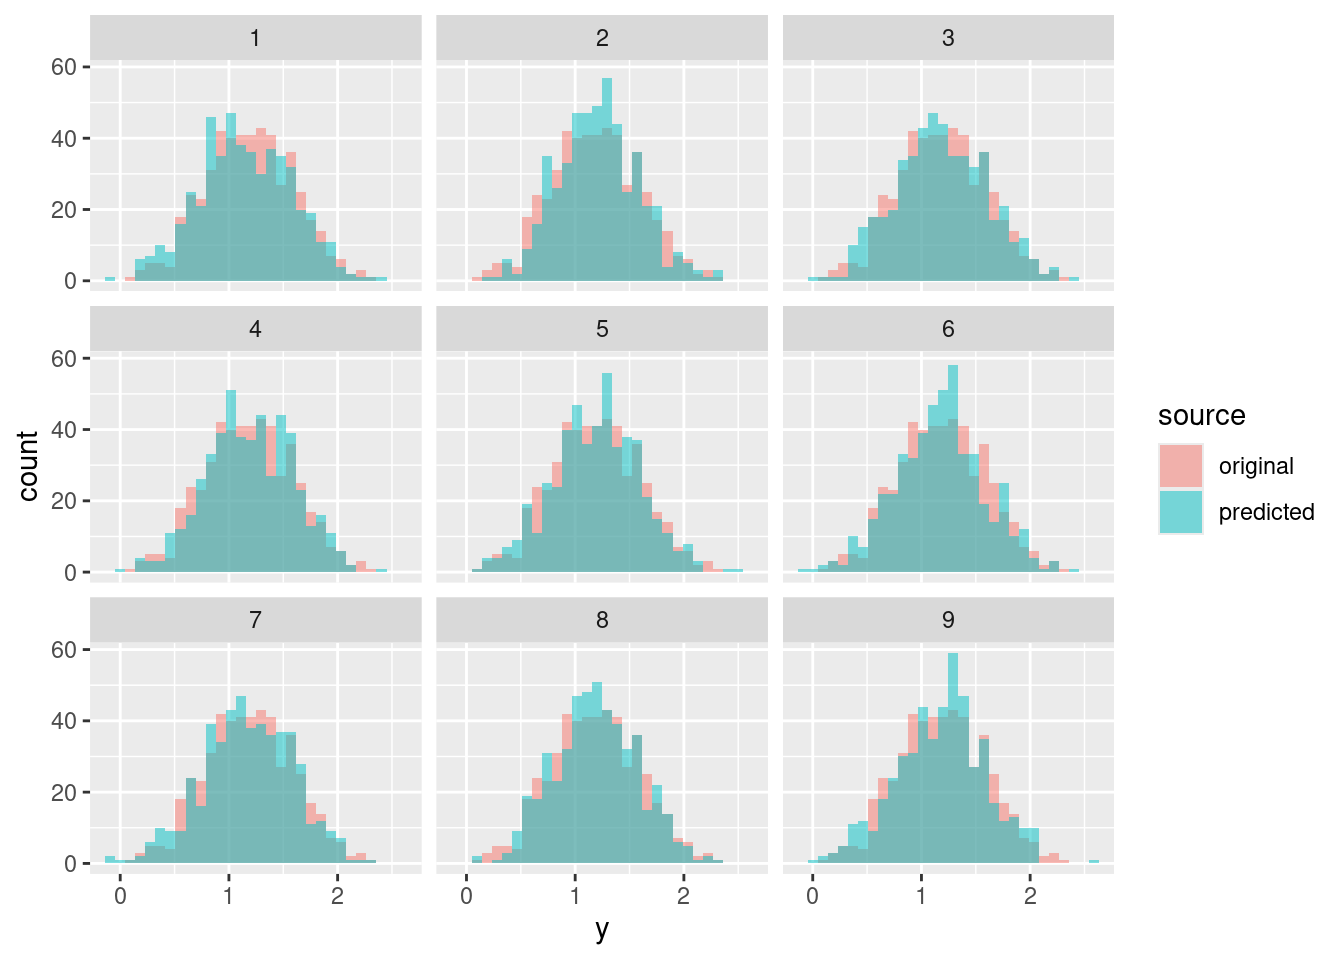

In [ ]:
pp <- NULL
for (s in 1:9) {
  mu_s <- S[s, '(Intercept)'] + S[s, 'x_1'] * df$x_1 + S[s, 'x_2'] * df$x_2
  y_s <- rnorm(n = nrow(df), mean = mu_s, sd = S[s, 'sigma'])
  pp <- rbind(pp, 
              data.frame(y = df$y, source = "original", s = s), 
              data.frame(y = y_s, source = "predicted", s = s))
}
ggplot(data = pp, aes(x = y, fill = source)) + 
  geom_histogram(alpha = .5, position = "identity") + 
  facet_wrap(~ s)

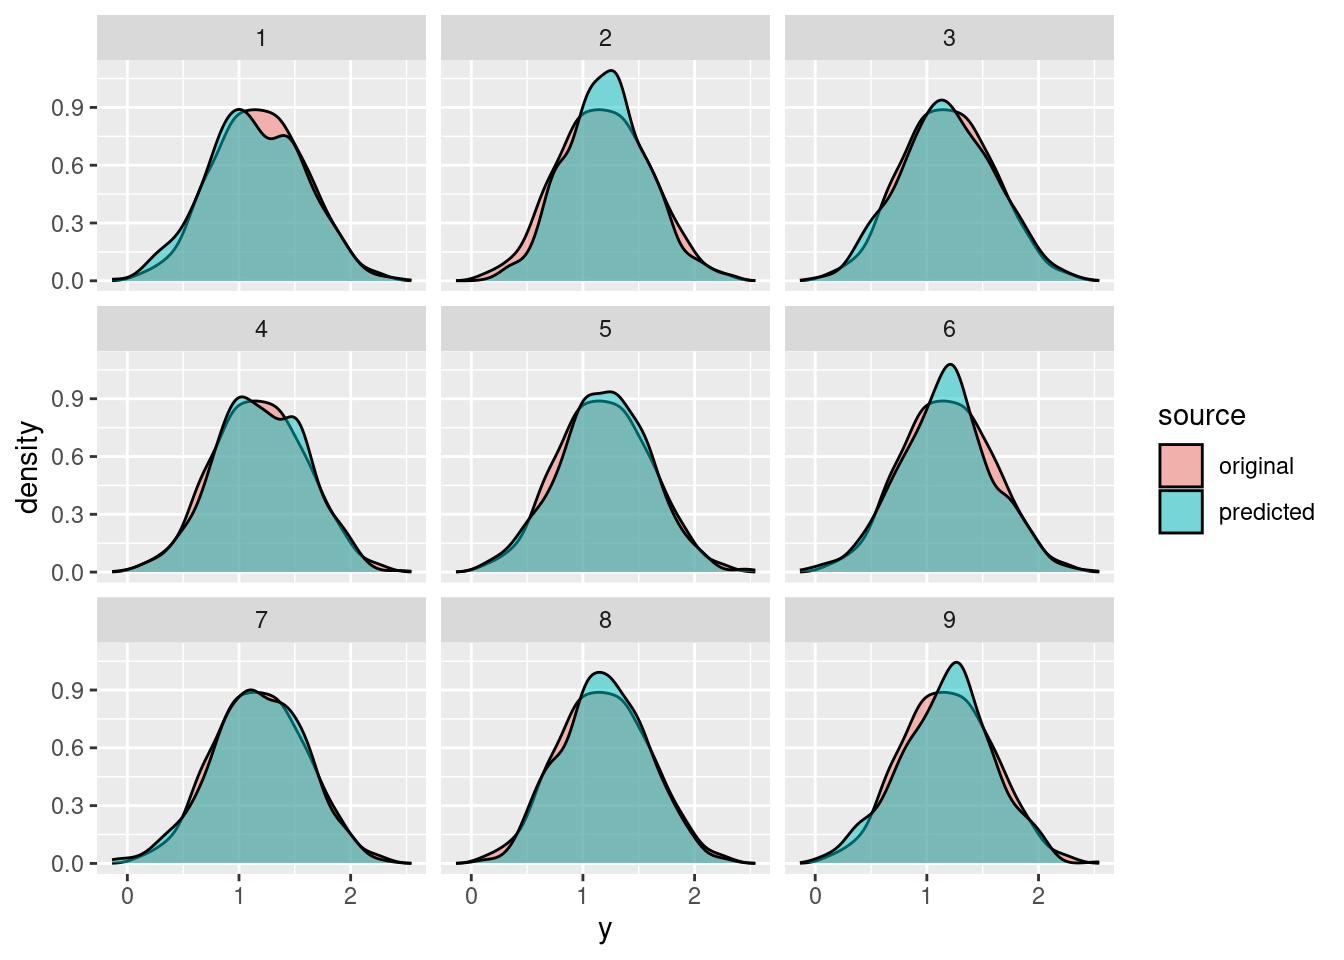

In [ ]:
ggplot(data = pp, aes(x = y, fill = source)) + 
  geom_density(alpha = .5, position = "identity") + 
  facet_wrap(~ s)

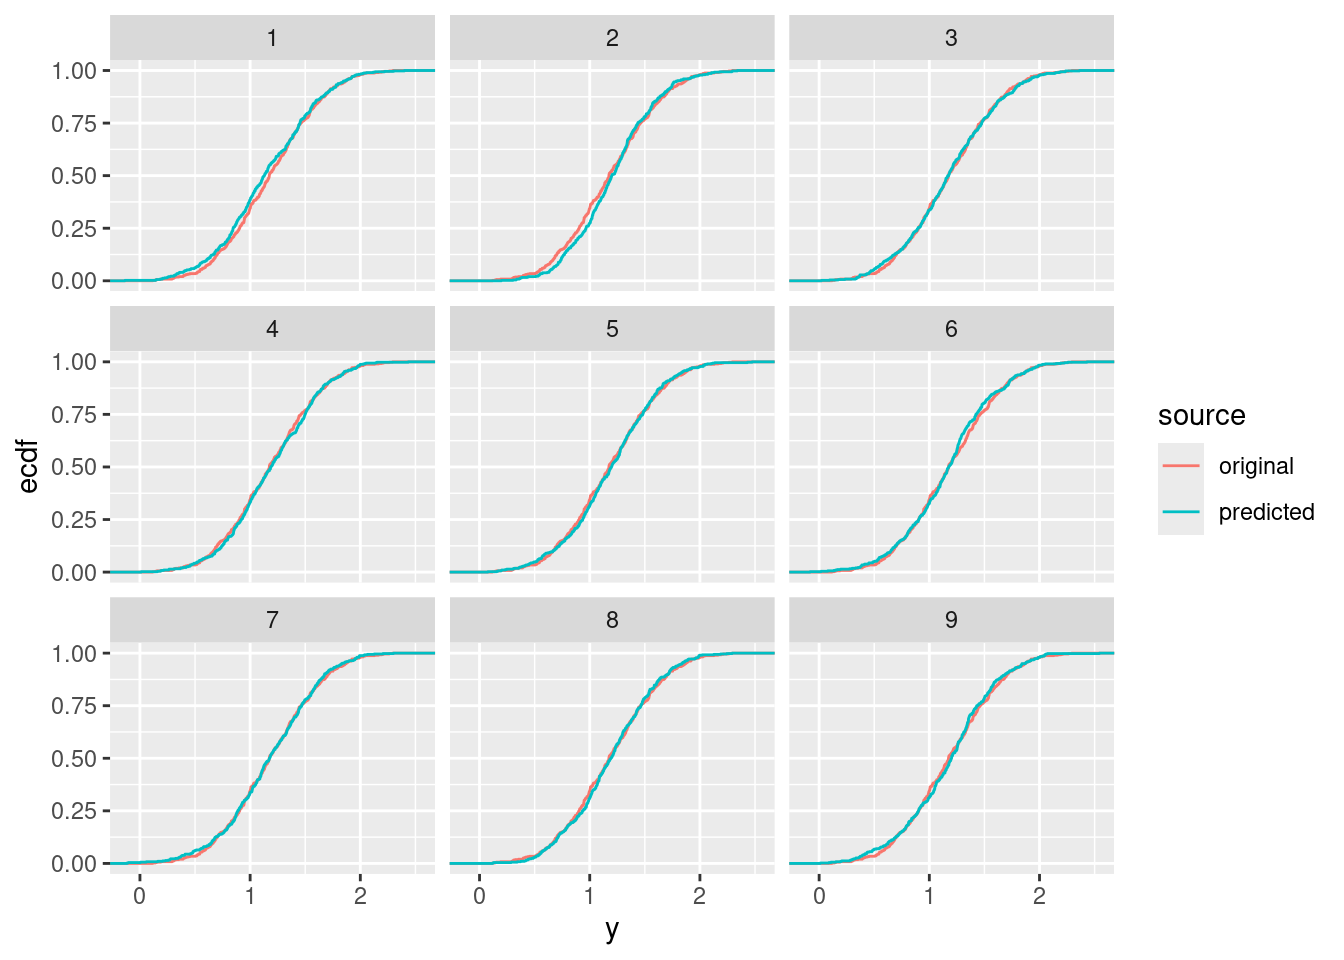

In [ ]:
ggplot(data = pp, aes(x = y, colour = source)) + 
  stat_ecdf() + 
  facet_wrap(~ s)

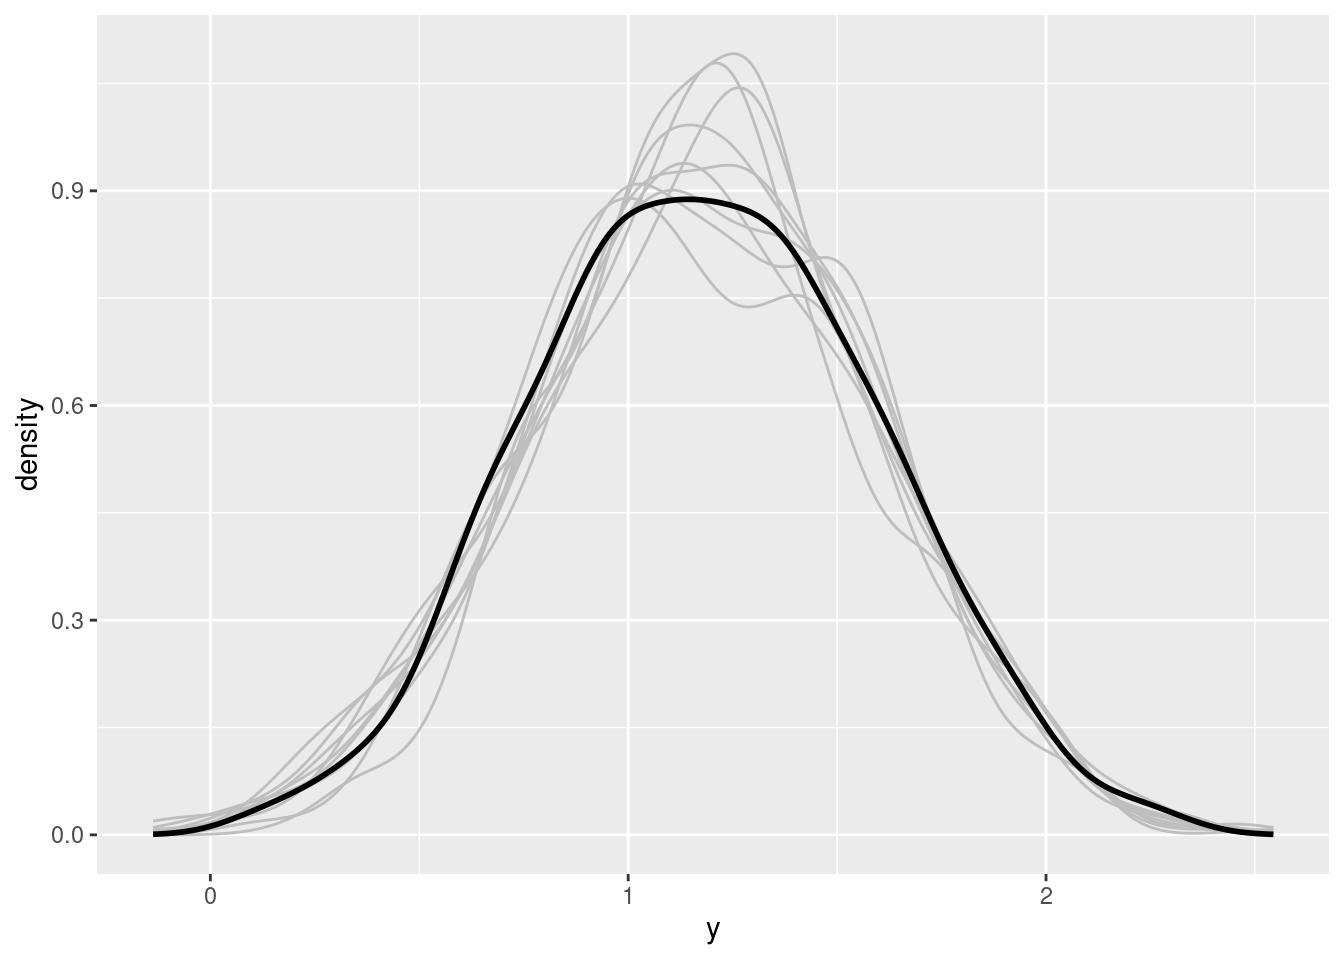

In [ ]:
ggplot(data = subset(pp, source == "predicted"),
       aes(x = y, group = s)) + 
  geom_density(position = "identity", fill = NA, colour = "grey") +
  geom_density(data = subset(pp, source == "original" & s == 1), 
               aes(x = y), linewidth = 1)

# References